In [459]:
#IMPORT LIBRARIES 
import numpy as np
import h5py #to interact with dataset stored on an H5 file
import matplotlib.pyplot as plt
 
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest' #works when a small image is scaled up
plt.rcParams['image.cmap'] = 'gray' #set the colormap to gray

In [460]:
#LOAD THE DATA
def load_data():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

#LOAD THE DATA
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a catpicture.


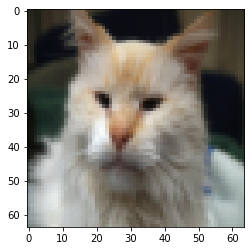

In [461]:
#SHOW A PICTURE
index = 27 #number of the picture 
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0, index]) + ". It's a " + classes[train_y[0, index]].decode("utf-8") + "picture.")

In [462]:
#EXPLORE THE DATA
m_train = train_x_orig.shape[0] #training set
num_px = train_x_orig.shape[1] #number of pixels
m_test = test_x_orig.shape[0] #test set

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [463]:
#RESHAPE AND STANDARDIZE THE IMAGES
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" flattens the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

#STANDARDIZE THE DATA (features go from 0 to 1)
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

#The input is now a (64, 64, 3) image flattened to a vector size of (12288, 1)


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


DEEP LEARNING METHODOLOGY 
1.   Initialize parameters and define hyperparameters (parameters that control the ultimate parameters W and b
2.   Training loop (for number of iterations)
    *   Forward propagation
    *   Cost function
    *   Backward propagation
    *   Update paramters
3.   Use trained parameters to predict labels

In [464]:
#CONSTANTS IN THE MODEL
n_x = 12288 # size of the input layer
n_h = 7 #size of the hidden layer
n_y = 1 #size of the ouput layer
layers_dims = (n_x, n_h, n_y) #layer dimensions

In [465]:
#INITIALIZE PARAMETERS

""" W = weights 
    b = bias """

def initialize_parameters(n_x, n_h, n_y):
  np.random.seed(1)
  
  W1 = np.random.randn(n_h, n_x) * 0.01
  b1 = np.zeros([n_h, 1])
  W2 = np.random.randn(n_y, n_h) * 0.01
  b2 = np.zeros([n_y, 1])

  assert(W1.shape == (n_h, n_x))
  assert(b1.shape == (n_h, 1))
  assert(W2.shape == (n_y, n_h))
  assert(b2.shape == (n_y, 1))

  parameters = {"W1" : W1,
                "b1" : b1,
                "W2" : W2,
                "b2" : b2}
  return parameters

In [466]:
parameters = initialize_parameters(2,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.00865408 -0.02301539]]
b2 = [[0.]]


LINEAR ACTIVATION FORWARD

In [467]:
# LINEAR FORWARD PROPAGATION
""" A = activiations from previus layer
    W = weights 
    b = bias

    Z = the input of the activation function (hypothesis)
"""
def linear_forward(A, W, b):
  Z = np.dot(W, A) + b

  assert(Z.shape == (W.shape[0], A.shape[1]))
  cache = (A, W, b)

  return Z, cache

In [468]:
#ACTIVATION FUNCTIONS
def sigmoid(Z):
  s = 1 / (1 + np.exp(-Z))
  cache = Z
  return s, cache

def relu(Z):
  r = np.maximum(0, Z)
  assert(r.shape == Z.shape)
  cache = Z
  return r, cache

In [469]:
#LINEAR ACTIVATION FORWARD
""" A_prev = activation from previous layer
    activation = activation used in current layer
"""
def linear_activation_forward(A_prev, W, b, activation):
  if activation == "sigmoid":
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = sigmoid(Z)
    #print(activation_cache)

  elif activation == "relu":
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = relu(Z)
    #print(activation_cache)

  assert (A.shape == (W.shape[0], A_prev.shape[1]))
  cache = (linear_cache, activation_cache)

  #print("cache: ", cache)

  return A, cache

In [470]:
#L-LAYER MODEL
""" X = data
"""
def L_model_forward(X, parameters):
  caches = []
  A = X
  L = len(parameters) // 2
  for l in range(1, L):
    A_prev = A

    #Linear RELU
    A, cache = linear_activation_forward(A_prev,
                                         parameters['W' + str(l)],
                                         parameters['b' + str(l)],
                                         activation = 'relu')
    caches.append(cache)

    #Linear SIGMOID
    AL, cache = linear_activation_forward(A,
                                          parameters['W' + str(L)],
                                          parameters['b' + str(L)],
                                          activation = 'sigmoid')
    
    caches.append(cache)

    assert(AL.shape == (1, X.shape[1]))
  return AL, caches

COMPUTE COST

In [471]:
#COST FUNCTION

""" AL = probability vetor coresponding to your label predictions
    Y = true "label" vector (0 or 1)
"""

def compute_cost(AL, Y):
  m = Y.shape[1]
  logprobs = np.multiply(np.log(AL),Y) +  np.multiply(np.log(1-AL), (1-Y))
  cost = -1/m*np.sum(logprobs)
  #cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))

  cost = np.squeeze(cost)
  assert(cost.shape == ())

  return cost

BACKWARD PROPAGATION

In [472]:
def sigmoid_backward(dA, activation_cache):
  Z = activation_cache[1]
  s = 1 / ( 1 + np.exp(-Z))
  dZ = dA * s * (1 - s)
  assert(dZ.shape == Z.shape)
  return dZ

def relu_backward(dA, activation_cache):
  Z = activation_cache[1]
  dZ = np.array(dA, copy = True)
  dZ[Z <= 0] = 0
  assert(dZ.shape == Z.shape)
  return dZ

In [473]:
#LINEAR BACKWARD PROPAGATION

""" dZ = gradient of the cost with respect to the linear output
    cache = tuple of values coming from the forward propagation in the current layer

    dA_prev = Gradient of the cost with respect to the activation of the previous layer
    dW = Gradient of the cost with respect to W
    db = Gradient of the cost with respect to b
"""

def linear_backward(dZ, cache):
  A_prev, W, b = cache[0]
  m = A_prev.shape[1]

  #print("cache: ", cache)

  dW = np.dot(dZ, A_prev.T) / m
  db = np.squeeze(np.sum(dZ, axis=1, keepdims=True)) / m
  dA_prev = np.dot(W.T, dZ)

  assert (dA_prev.shape == A_prev.shape)
  assert (dW.shape == W.shape)
  #assert (isinstance(db, float))
    
  return dA_prev, dW, db

In [474]:
#LINEAR ACTIVATION BACKWARD

def linear_activation_backward(dA, cache, activation):

  if activation == 'relu':
    dZ = relu_backward(dA, cache)
  
  elif activation == 'sigmoid':
    dZ = sigmoid_backward(dA, cache)

  dA_prev, dW, db = linear_backward(dZ, cache)

  return dA_prev, dW, db

UPDATE PARAMETERS

In [475]:
#UPDATE PARAMETERS

def update_parameters(parameters, grads, learning_rate):
  L = len(parameters) // 2 #number of layers in the neural network

  for l in range(L):
    parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
    parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]

  return parameters

In [476]:
#TWO LAYER NEURAL NETWORK

""" X = input data, of shape (n_x, number of examples)
      Y = true \ false label vector, of shape (1, number of examples)
      layers_dims = dimensions of the layers (n_x, n_h, n_y)
      num_iterations = number of iterations of the optimization loop
      learning_rate = learning rate of the gradient descent update rule
      print_cost = If set to True, this will print the cost every 100 iterations 
      parameters = a dictionary containing W1, W2, b1, and b2
"""

def two_layer_model(X, Y, layers_dims, learning_rate, num_iterations, print_cost=False):   
  np.random.seed(1)
  grads = {}
  costs = []                              
  m = X.shape[1] # number of examples
    
  parameters = initialize_parameters(n_x, n_h, n_y)
   
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
 
# Gradient descent

  for i in range(0, num_iterations):

  # Forward propagation
    A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
    A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')

    # Cost
    cost = compute_cost(A2, Y)

    # Backward propagation
    dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
    
    dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
    dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')

    auxdb1 = db1
    auxdb1 = np.reshape(auxdb1, (7,1))
    auxdb2 = db2
    auxdb2 = np.reshape(auxdb2, (1,1))
    db1 = auxdb1
    db2 = auxdb2
    
    grads['dW1'] = dW1
    grads['db1'] = db1
    grads['dW2'] = dW2
    grads['db2'] = db2

    # Update parameters.
    parameters = update_parameters(parameters, grads, learning_rate)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Print the cost every 100 training example
    if print_cost and i % 100 == 0:
        print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        costs.append(cost)
       
  # plot the cos
  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per tens)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
  
  return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6470566917793795
Cost after iteration 200: 0.6351119496816243
Cost after iteration 300: 0.6090111284723495
Cost after iteration 400: 0.5716612513844933
Cost after iteration 500: 0.5309913010907248
Cost after iteration 600: 0.4890291801302887
Cost after iteration 700: 0.45384881137073496
Cost after iteration 800: 0.3918905247026613
Cost after iteration 900: 0.37230441282036447
Cost after iteration 1000: 0.3538361575423492
Cost after iteration 1100: 0.3158701526788494
Cost after iteration 1200: 0.27467785691121516
Cost after iteration 1300: 0.21594038823022518
Cost after iteration 1400: 0.21207540427288146
Cost after iteration 1500: 0.1997886265733261
Cost after iteration 1600: 0.14591891071053587
Cost after iteration 1700: 0.12765784720887882
Cost after iteration 1800: 0.1116853226972328
Cost after iteration 1900: 0.09651552314020818
Cost after iteration 2000: 0.08343023469313252
Cost after iteration 2100: 0.074520319

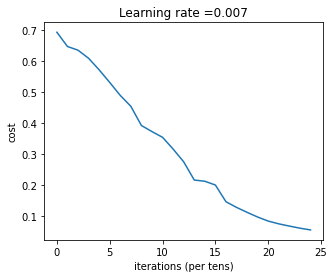

In [477]:
parameters = two_layer_model(train_x, train_y, (n_x, n_h, n_y), 0.007, 2500, print_cost = True)

In [478]:
def predict(X, y, parameters):
  m = X.shape[1]
  n = len(parameters) // 2 # number of layers in the neural network
  p = np.zeros((1,m))

  # Forward propagation
  probability, caches = L_model_forward(X, parameters)

  # convert probas to 0/1 predictions
  for i in range(0, probability.shape[1]):
      if probability[0,i] > 0.5:
          p[0,i] = 1
      else:
          p[0,i] = 0

  print("Accuracy: "  + str(np.sum((p == y)/m)))
      
  return p

In [479]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9904306220095692


In [480]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


Accuracy: 1.0
y = 1.0, The model predicts a "cat" picture.


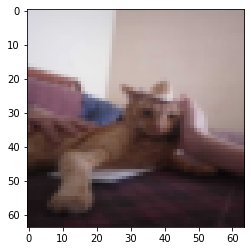

In [482]:
import imageio
from skimage.transform import resize

my_image = "duquesa_som.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

fname = "images/" + my_image
im = imageio.imread(fname)
im = resize(im, (64,64)) 
image = np.array(im)
image = image / 255.
num_px = 64
my_image = image.reshape((num_px*num_px*3, 1)) # WITHOUT RESIZE
my_image_prediction = predict(my_image, my_label_y, parameters) 

plt.imshow(im)
print ("y = " + str(np.squeeze(my_image_prediction)) + ", The model predicts a \"" + classes[int(np.squeeze(my_image_prediction)),].decode("utf-8") +  "\" picture.")